In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
!ls

gdrive	sample_data


#***Data Loading and Pre-processing***

In [21]:
import pandas as pd
import numpy as np

data = pd.read_excel('./gdrive/My Drive/User_Stats_Age.xlsx')
data = data.fillna(0).iloc[1:,:]
data.head(10)

,Age Groups,No. of Users,Avg No. of Cycles Tracked,Total Fertility Tests,No. Users Taking Fertility Tests,Fertility Tests +ive,No. Users with +ive Fertility Tests,Total Pregnancy Tests,No. Users Taking Pregnancy Tests,Pregnancy Tests +ive,No. Users with +ive Pregnancy Tests,Avg No. of Notes,Avg Months Using App,Avg Period Length,Avg Cycle Length,Total interactions with App in Morning (base on last 30 backups),Total interactions with App in Afternoon (base on last 30 backups),Total interactions with App in Evening (base on last 30 backups)
1,13,2,1,2,1,0,0,2,1,0,0,0,1,3.0,3.0,2,0,0
2,14,1,2,1,1,0,0,0,0,0,0,0,2,7.0,28.0,0,0,0
3,15,5,1,1,1,0,0,2,1,0,0,0,1,4.0,12.0,2,0,0
4,16,13,1,0,0,0,0,5,1,0,0,8,1,4.0,26.0,1,0,0
5,17,30,1,20,7,6,3,15,5,0,0,0,1,5.0,25.0,5,1,0
6,18,73,1,98,17,9,2,106,16,1,1,2,1,5.0,22.0,64,8,0
7,19,96,1,88,28,12,7,194,24,5,3,2,1,5.0,23.0,17,3,1
8,20,147,2,177,42,27,10,145,34,13,5,14,2,5.0,21.0,114,13,1
9,21,102,2,96,27,18,10,98,22,6,4,1,2,5.0,21.0,82,14,0
10,22,105,1,123,21,21,6,55,16,6,4,3,1,5.0,23.0,15,6,0


#***App Usage Distribution With Age***

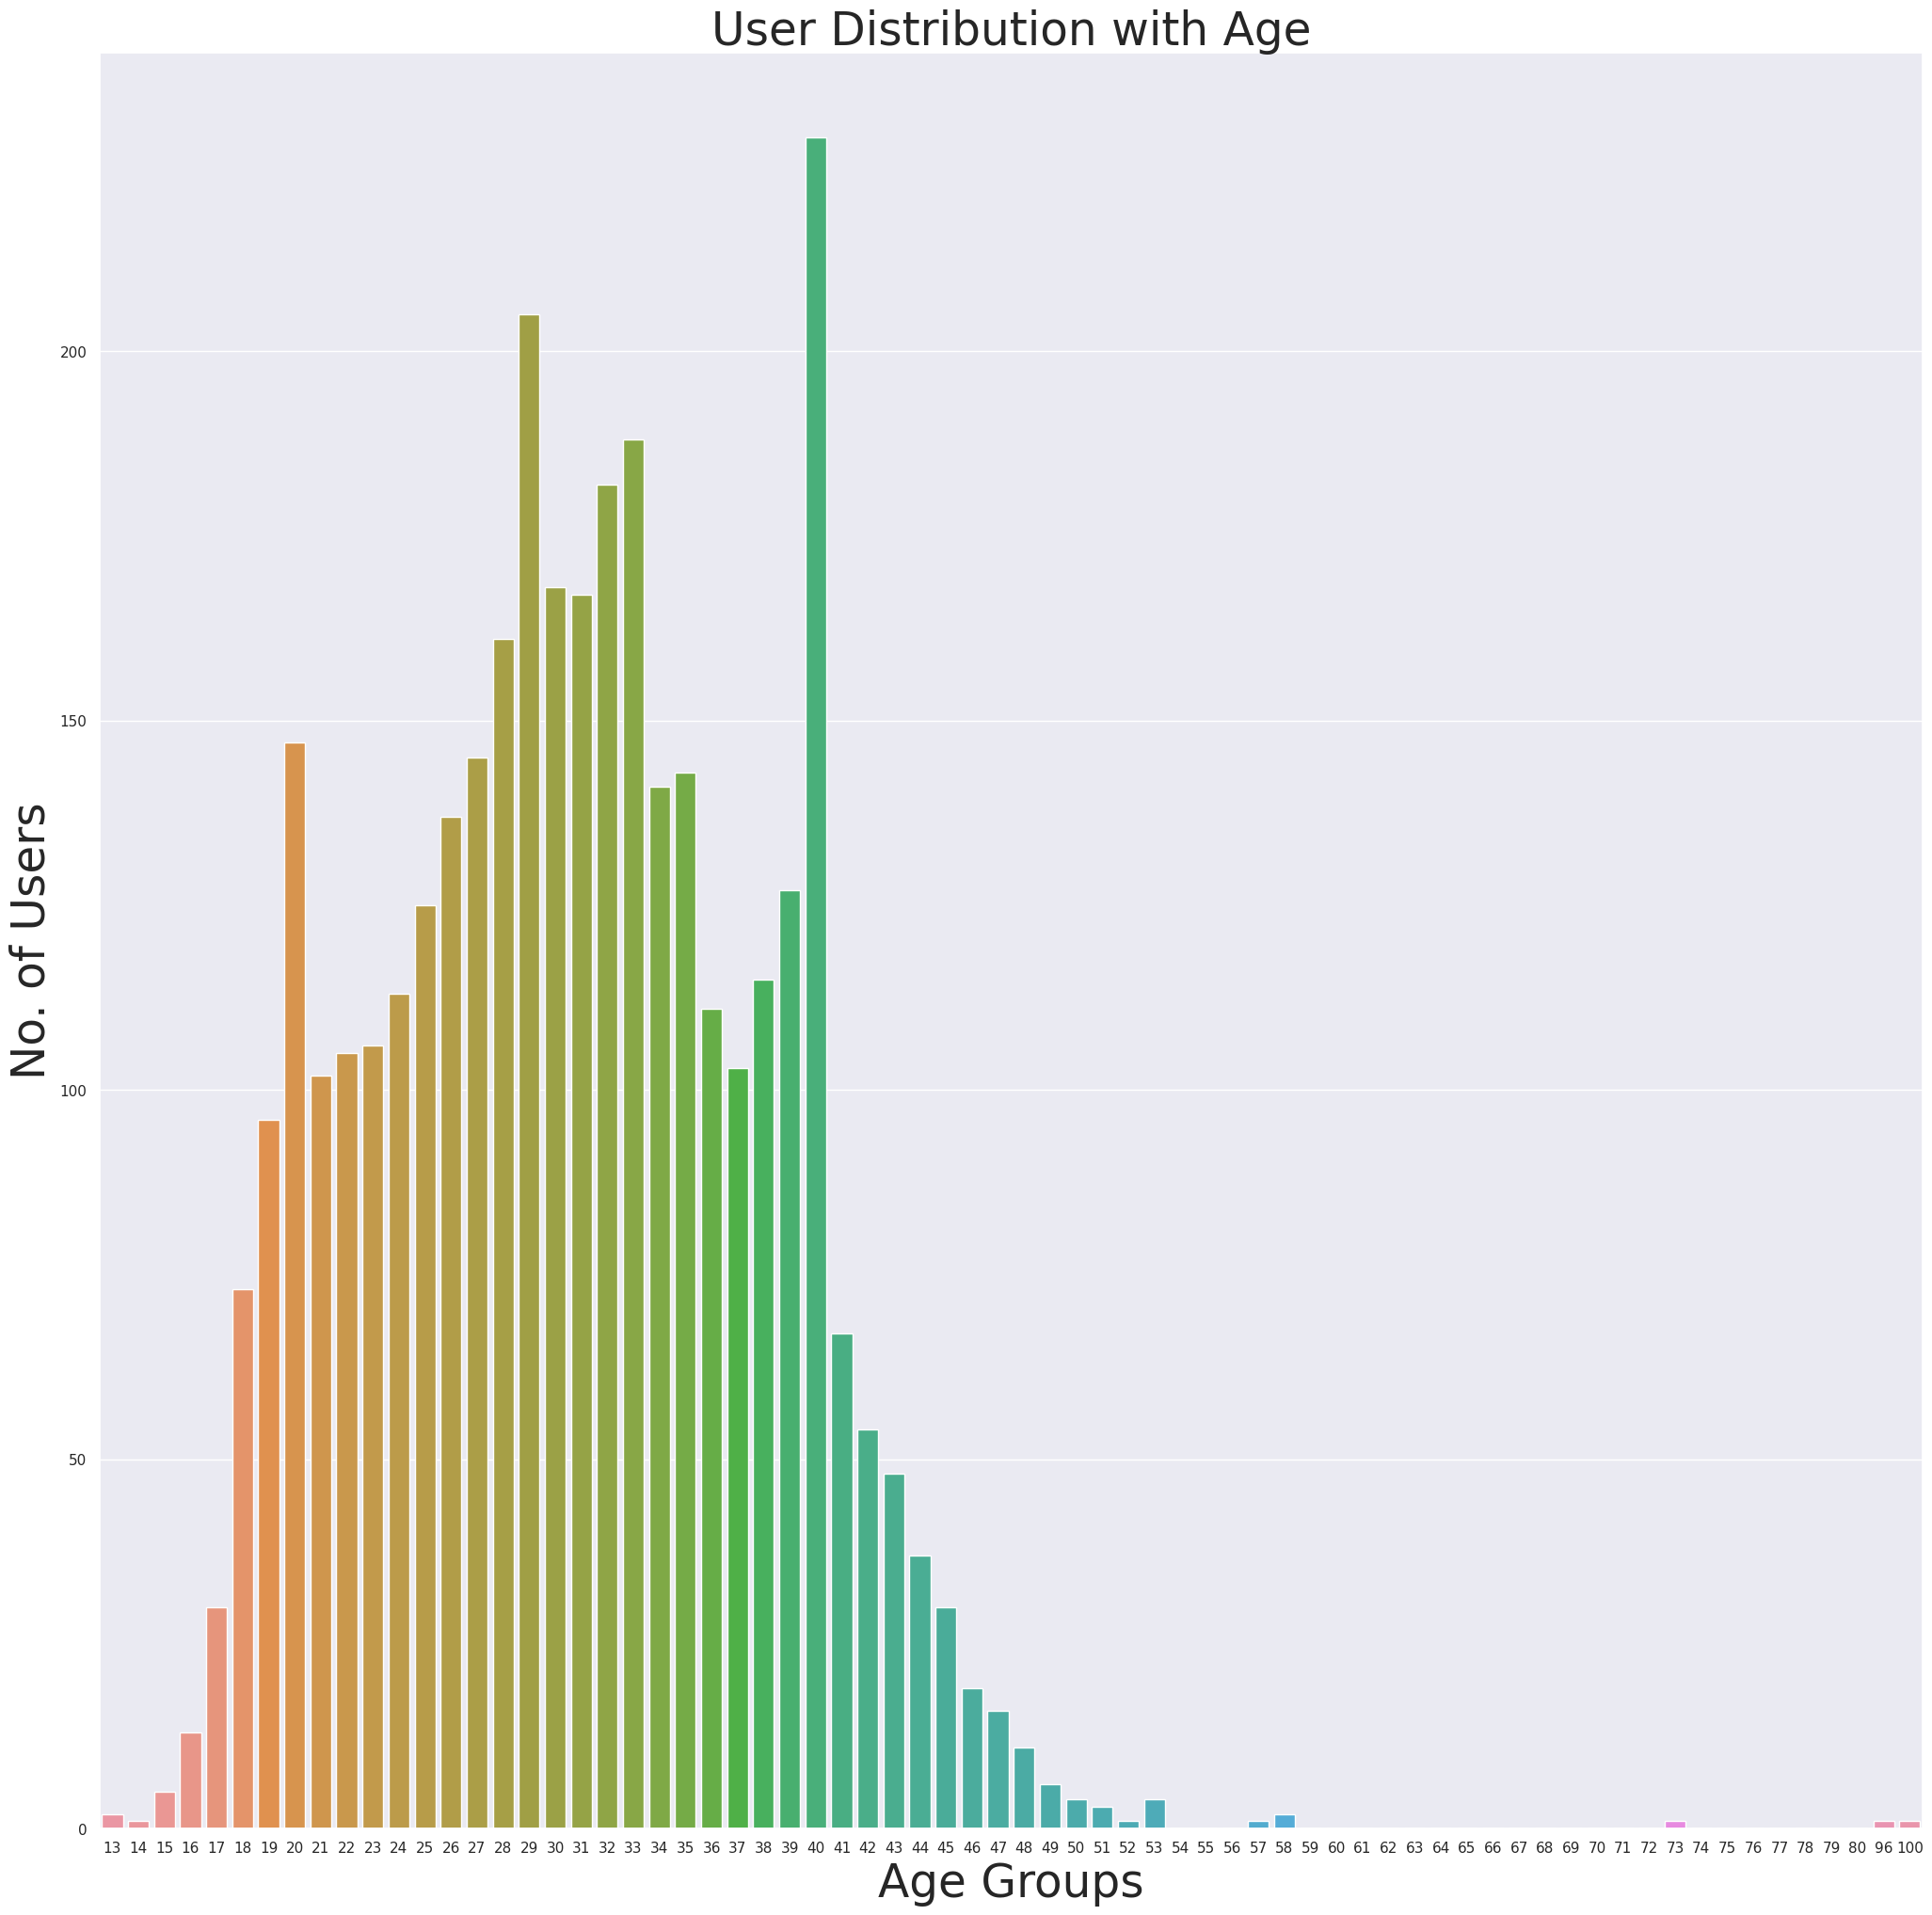

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt
userAge = data[['Age Groups','No. of Users' ]]

fig_dims = (25, 25)

sns.set()
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_xlabel('Age Groups',fontsize=35)
ax.set_ylabel('No. of Users',fontsize=35)
ax.axes.set_title('User Distribution with Age',fontsize=35)
sns.barplot(x="Age Groups", y="No. of Users", ax = ax,data=userAge)

####***Analysis***

We can clearly see that only a particular sector of all the ages uses this application the most. This is an indicator for our analysis but we need to dig deep to capture better insights.

#***User Segmentation with Age***

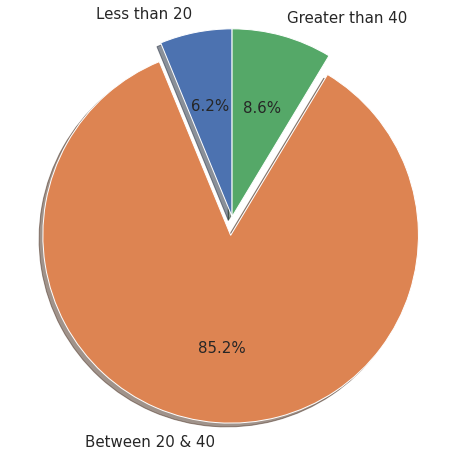

In [83]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

labels = [0,2,1]
UserSeg = data[['Age Groups','No. of Users' ]]
UserSeg['Groups'] = UserSeg['Age Groups'].apply(lambda x: labels[0] if x<20 else (labels[1] if x>40 else labels[2] ))
UserSegClustered = UserSeg.groupby(['Groups']).sum()[['No. of Users']] 
labels = 'Less than 20', 'Between 20 & 40', 'Greater than 40'
Values = UserSegClustered['No. of Users'].values
explode = (0, 0.1, 0) 
fig_dims = (8, 8)
fig1, ax1 = plt.subplots(figsize=fig_dims)
ax1.pie(Values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 15})
ax1.axis('equal') 

plt.show()





####***Analysis***
It can be observed emperically that the users lieing between the ages of 20 & 40 predominantly form the largest segment of the application users. Market startergies can be used to promote application usage through targeted advirtisement for this group in order to boost the profits.

#***App Usage With Respect to Time***

,Timings,PercentOfUsers
0,Morning,80.0
1,AfterNoon,13.0
2,Evening,7.0


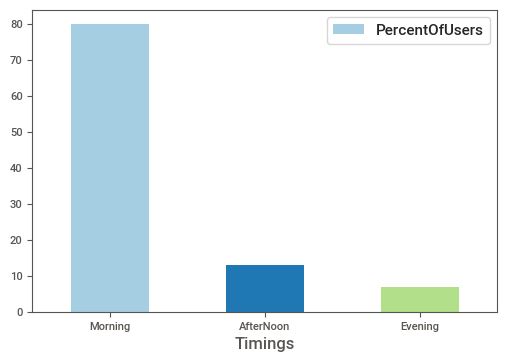

In [118]:
ColNames = list(data)
labels = ['Morning', 'AfterNoon', 'Evening']
TimeCount = [data[[ColNames[-3]]].sum()[0] , data[[ColNames[-2]]].sum()[0] , data[[ColNames[-1]]].sum()[0] ]
TimeCountPercentage = 100*(TimeCount/sum(TimeCount))
TimeCountRounded = [round(num,0) for num in TimeCountPercentage]
TimeSeg = pd.DataFrame({'Timings': labels, 'PercentOfUsers': TimeCountRounded})
TimeSeg.plot.bar(x='Timings', y='PercentOfUsers', rot=0,color=plt.cm.Paired(np.arange(len(labels))))
TimeSeg



####***Analysis***
From the data grouping we can vividly see that the application is used mostly during the morning. It would be a good idea to introduce features which are relevant for the early risers as they form the biggest share of the users.

#***Popularity of Different Tests***

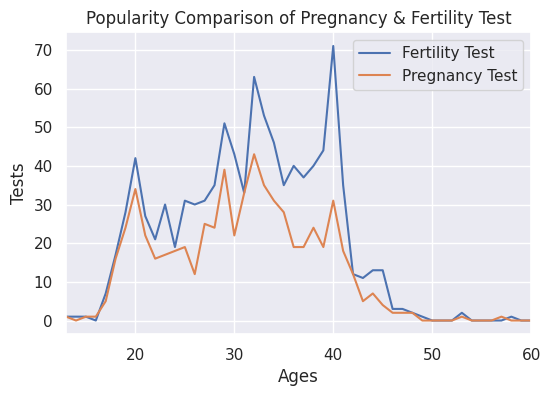

In [234]:
Ages = data['Age Groups'].values
FertTestCases = data['No. Users Taking Fertility Tests'].values
PregTestCases = data['No. Users Taking Pregnancy Tests'].values
sns.set()
plt.plot(Ages,FertTestCases,label='Fertility Test')
plt.plot(Ages,PregTestCases,label='Pregnancy Test')
plt.xlabel('Ages')
plt.ylabel('Tests')
plt.title('Popularity Comparison of Pregnancy & Fertility Test')
plt.xlim(13,60)
plt.legend()
plt.show()

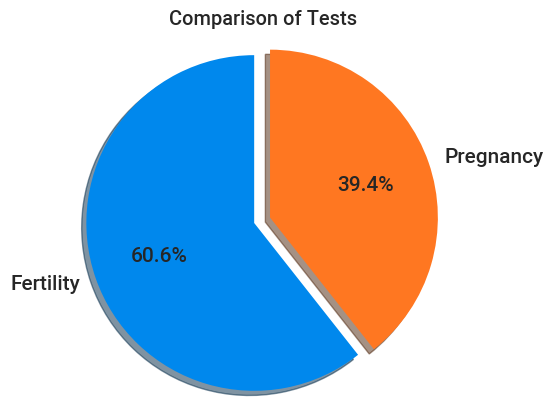

In [133]:
FertTestCases = data[['No. Users Taking Fertility Tests']].sum()
PregTestCases = data[['No. Users Taking Pregnancy Tests']].sum()
labels = 'Fertility' , 'Pregnancy'
Cases = [FertTestCases , PregTestCases]

explode = (0, 0.1) 
fig_dims = (5, 5)
fig1, ax1 = plt.subplots(figsize=fig_dims)
ax1.pie(Cases, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 15})
ax1.axis('equal') 
plt.title('Comparison of Tests')

plt.show()

####***Analysis***

Both the visualizations show that the most of the users use this application for Fertility testing. There is a need to find out why the application is not being used a lot for pregnancy testing. A rigorous study should be conducted to see how the application can be made more conducive for pregnancy testing.

#***Percantage of Users Not Using Application for Testing***

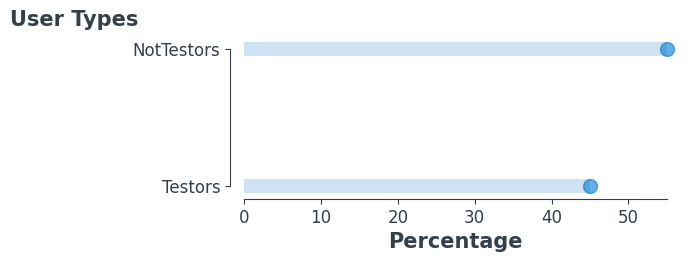

In [182]:
data['Testing Users'] = data['No. Users Taking Fertility Tests'] + data['No. Users Taking Pregnancy Tests']
TestingUsers = data[['Testing Users']].sum()[0]
TotalUsers = data[['No. of Users']].sum()[0]

TestingUsersPercent = round(100*(TestingUsers/TotalUsers),0)
NotTestingUsersPercent = round(100*((TotalUsers - TestingUsers)/TotalUsers))
percentages = pd.Series([TestingUsersPercent,NotTestingUsersPercent],index=['Testors', 'NotTestors'])
df = pd.DataFrame({'percentage' : percentages})


my_range=list(range(1,len(df.index)+1))
fig, ax = plt.subplots(figsize=(6,2))

plt.hlines(y=my_range, xmin=00, xmax=df['percentage'], color='#007ACC', alpha=0.2, linewidth=10)
plt.plot(df['percentage'], my_range, "o", markersize=10, color='#007ACC', alpha=0.6)

ax.set_xlabel('Percentage', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

fig.text(-0.23, 0.96, 'User Types', fontsize=15, fontweight='black', color = '#333F4B')


plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)


ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))




####***Analysis***

In accordance with the above analysis and visualization we can conclude that more than half majority of the people who use the application do not undergo testing. In to address this issue, incentives should be given to users to promote testing.

#***User Experience***

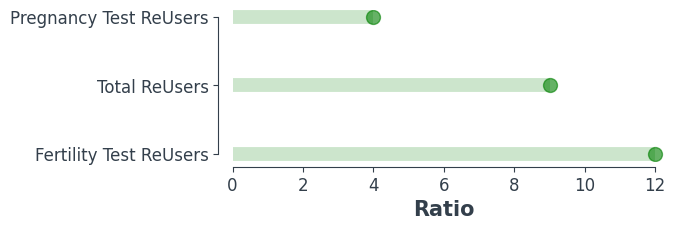

In [202]:
data['ReUsers'] = (data['Total Fertility Tests'] - data['No. Users Taking Fertility Tests']) + (data['Total Pregnancy Tests'] - data['No. Users Taking Pregnancy Tests'])
data['ReUsersFert'] = data['Total Fertility Tests'] - data['No. Users Taking Fertility Tests']
data['ReUsersPreg'] = data['Total Pregnancy Tests'] - data['No. Users Taking Pregnancy Tests']

ReUsersFert = data[['ReUsersFert']].sum()[0]
UsersFert = data[['No. Users Taking Fertility Tests']].sum()[0]
ReUserFertRatio = round(ReUsersFert/UsersFert,0)

ReUsersPreg = data[['ReUsersPreg']].sum()[0]
UsersPreg = data[['No. Users Taking Pregnancy Tests']].sum()[0]
ReUserPregRatio = round(ReUsersPreg/UsersPreg,0)

ReUserCombinedRatio = round(((ReUsersFert + ReUsersPreg)/(UsersFert + UsersPreg)),0)


ratio = pd.Series([ReUserFertRatio,ReUserCombinedRatio,ReUserPregRatio],index=['Fertility Test ReUsers', 'Total ReUsers', 'Pregnancy Test ReUsers'])
df = pd.DataFrame({'ratio' : ratio})


my_range=list(range(1,len(df.index)+1))
fig, ax = plt.subplots(figsize=(6,2))

plt.hlines(y=my_range, xmin=00, xmax=df['ratio'], color='green', alpha=0.2, linewidth=10)
plt.plot(df['ratio'], my_range, "o", markersize=10, color='green', alpha=0.6)

ax.set_xlabel('Ratio', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))





####***Analysis***

A very interesting insight drawn from this analysis and visualization is that users that undergo testing choose this application multiple times for retesting. A plausable explaination of this might be that the user satisfaction and experience are both above satisfactory. In other words, user rentention is undoubtly high.

#***Percentage Positive Tests Across Age Groups***

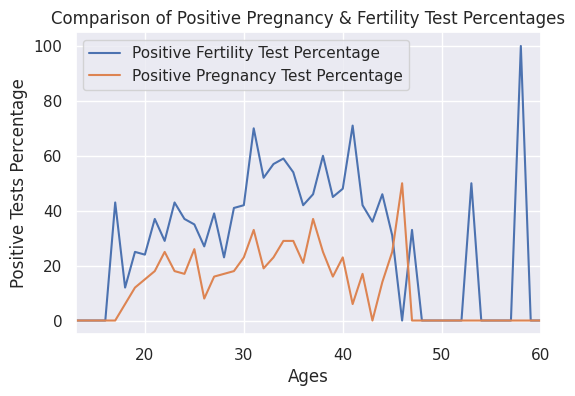

In [240]:
def computePercent(num,den):
  if den==0:
    return 0
  else:
    return round((100*num/den),0)

data['Percentage Positive Fertility Test'] = data.apply(lambda x :computePercent(x['No. Users with +ive Fertility Tests'],x['No. Users Taking Fertility Tests']),axis=1)
data['Percentage Positive Pregnancy Test'] = data.apply(lambda x :computePercent(x['No. Users with +ive Pregnancy Tests'],x['No. Users Taking Pregnancy Tests']),axis=1)
FertSeg = data[['Age Groups','Percentage Positive Fertility Test' ]]
PregSeg = data[['Age Groups','Percentage Positive Pregnancy Test' ]]

sns.set()
plt.plot(FertSeg['Age Groups'].values,FertSeg['Percentage Positive Fertility Test'].values,label='Positive Fertility Test Percentage')
plt.plot(PregSeg['Age Groups'].values,PregSeg['Percentage Positive Pregnancy Test'].values,label='Positive Pregnancy Test Percentage')
plt.xlabel('Ages')
plt.ylabel('Positive Tests Percentage')
plt.title('Comparison of Positive Pregnancy & Fertility Test Percentages')
plt.xlim(13,60)
plt.legend()
plt.show()





####***Analysis***

The positive test percentage is fairly high for fertility test as compared to pregnancy test. However, an ironic insight is that test percentages increase a lot during the older ages. This is a really interesting observation which should be investigated in detail.

#***Correlation between Age and Avg Period  & Cycle Length***

                   Age Groups  Avg Period Length
Age Groups           1.000000          -0.577855
Avg Period Length   -0.577855           1.000000


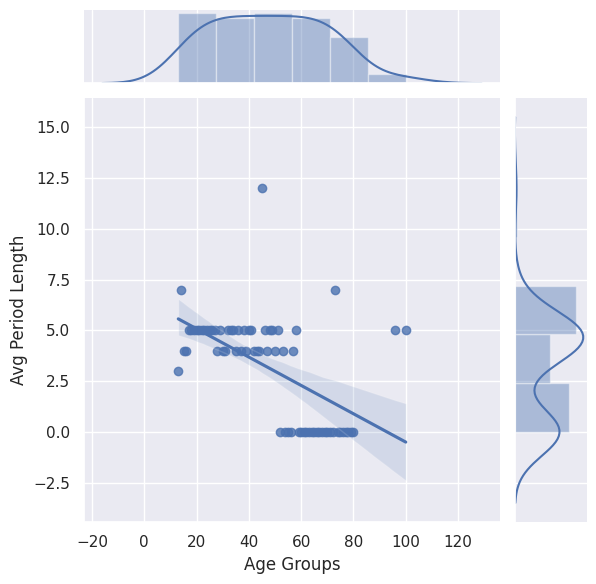

In [243]:
 sns.jointplot(x=data['Age Groups'], y=data['Avg Period Length'], kind='reg')
 AgePeriod = data[['Age Groups','Avg Period Length']]
 AgePeriodCorr = AgePeriod.corr()
 print(AgePeriodCorr)

####***Analysis***

Both Average Period and Cycle lengths show a negative correlation with age. In other words as the age increases both the average period and cycle length decreases. However, this correlation is weak therefore this I would not mark this result as authentic.

                  Age Groups  Avg Cycle Length
Age Groups          1.000000         -0.500291
Avg Cycle Length   -0.500291          1.000000


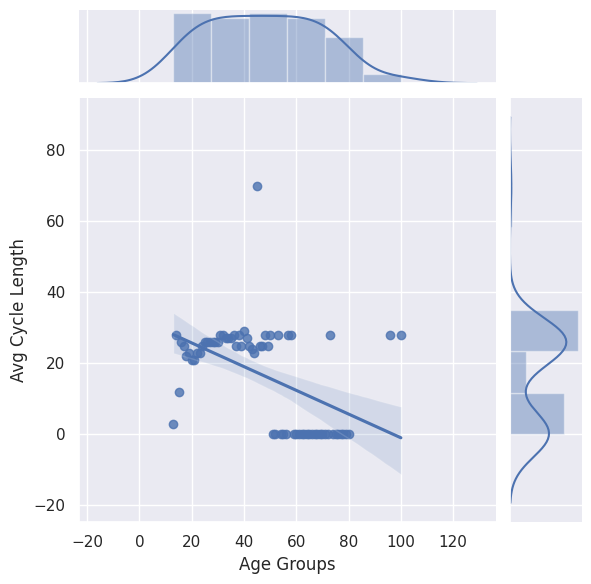

In [245]:
sns.jointplot(x=data['Age Groups'], y=data['Avg Cycle Length'], kind='reg')
AgeCycle = data[['Age Groups','Avg Cycle Length']]
AgeCycleCorr = AgeCycle.corr()
print(AgeCycleCorr)